
# 08. Redes neuronales convolucionales
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)


In [30]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.1.0-rc1


In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [32]:

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)          0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

In [35]:
from keras.utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)


(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [36]:

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.9018 - accuracy: 0.7697
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2733 - accuracy: 0.9198
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1980 - accuracy: 0.9417
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1585 - accuracy: 0.9535
Epoch 5/5
10000/10000 [==============================] - 1s 77us/sample - loss: 0.1178 - accuracy: 0.9661
Test accuracy: 0.9661


## Datos Fashion-MNIST

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [0]:

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

In [42]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.8079 - accuracy: 0.7164
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5099 - accuracy: 0.8157
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4479 - accuracy: 0.8425
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4136 - accuracy: 0.8537
Epoch 5/5
10000/10000 [==============================] - 1s 69us/sample - loss: 0.4075 - accuracy: 0.8589
Test accuracy: 0.8589


In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [0]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

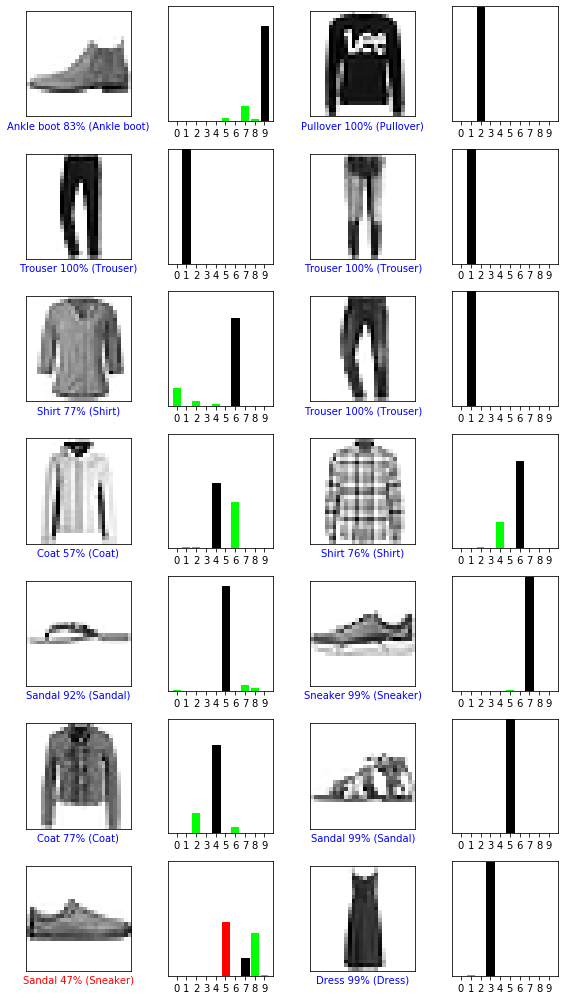

In [46]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


In [0]:

model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))



In [52]:

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.7907 - accuracy: 0.7172
Epoch 2/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.5002 - accuracy: 0.8184
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4297 - accuracy: 0.8447
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3922 - accuracy: 0.8587
Epoch 5/5
10000/10000 [==============================] - 1s 75us/sample - loss: 0.3818 - accuracy: 0.8624

Test accuracy: 0.8624


In [55]:
# optimizer='adam'
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4032 - accuracy: 0.8558
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2683 - accuracy: 0.9001
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2254 - accuracy: 0.9176
Epoch 4/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1958 - accuracy: 0.9279
Epoch 5/5
10000/10000 [==============================] - 1s 73us/sample - loss: 0.2565 - accuracy: 0.9106

Test accuracy: 0.9106
